iterazione 1  | loss:12.130434782608695
iterazione 2  | loss:10.611576929359744
iterazione 3  | loss:9.397140337367532
iterazione 4  | loss:8.425884411944606
iterazione 5  | loss:7.648888940570136
iterazione 6  | loss:7.027075477059593
iterazione 7  | loss:6.529227373941761
iterazione 8  | loss:6.130408144941493
iterazione 9  | loss:5.810698021473383
iterazione 10  | loss:5.554184688839993
iterazione 11  | loss:5.348157066233518
iterazione 12  | loss:5.1824612821659715
iterazione 13  | loss:5.048986214833669
iterazione 14  | loss:4.941252531528135
iterazione 15  | loss:4.8540844051437935
iterazione 16  | loss:4.783347274794997
iterazione 17  | loss:4.725738363781112
iterazione 18  | loss:4.67861934117056
iterazione 19  | loss:4.639882648545876
iterazione 20  | loss:4.607844719148963
iterazione 21  | loss:4.581160679210472
iterazione 22  | loss:4.558756209675174
iterazione 23  | loss:4.539773115992886
iterazione 24  | loss:4.523525848184881
iterazione 25  | loss:4.509466768208073
iteraz

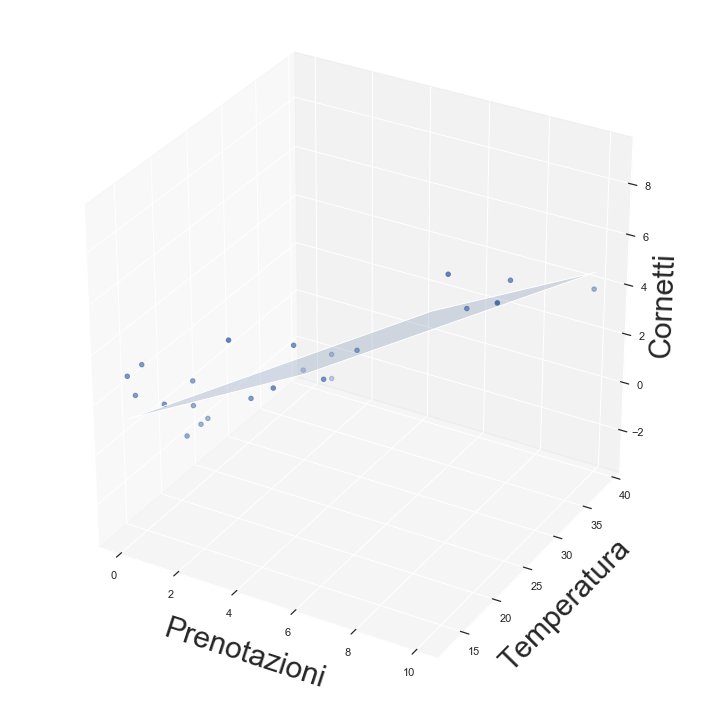

In [1]:
%matplotlib inline
import drawer 
import numpy as np
import matplotlib.pyplot as plt

def prediction(X,W): 
    return np.matmul(X,W)

def loss(X,Y,W):
    error=prediction(X,W) - Y
    squared_error = error**2
    return np.average(squared_error)

def gradient(X, Y, W):
    return 2 * np.matmul(X.T, (prediction(X, W) - Y)) / X.shape[0]


def training(X,Y,iteration,learning_rate):
    W = np.zeros((X.shape[1], 1))
    for i in range(iteration):
        current_loss = loss(X,Y,W)
        W -= gradient(X, Y, W) * learning_rate
        print(f"iterazione {i+1}  | loss:{current_loss}")
 
    return W
        
# carico il training set 
x1,x2,y = np.loadtxt("cornetti_with_2_variables.txt",skiprows=1,unpack=True)
X = np.column_stack((np.ones(x1.size), x1, x2))
Y = y.reshape(-1, 1)

# avvio  il training
W= training(X,Y,100000,0.0001)


print("\nWeights: %s" % W.T)
print("\nA few predictions:")
for i in range(5):
    print("X[%d] -> %.4f (label: %d)" % (i, prediction(X[i], W), Y[i]))
    
drawer.plane(W,x1,x2,y)